In [1]:
%matplotlib inline

import numpy as np
from numpy import linalg as nla
import scipy as sp
from scipy import linalg as sla
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pprint import pprint
from time import time
import SHFunctions as shf
import os

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
np.set_printoptions(linewidth = 200)

In [2]:
A = shf.MakeGenSingA(5, 2, delta = .00000)
A

array([[[ 0.00000000e+00,  1.52939048e-01,  1.68341260e-02,  1.33752487e-01,  2.98076725e-02],
        [ 8.89206349e-02,  0.00000000e+00,  1.27517552e-01,  6.57855162e-02,  5.11096304e-02],
        [ 1.19718830e-01,  1.12174387e-01,  0.00000000e+00,  5.35000348e-02,  4.79400812e-02],
        [ 3.58365885e-05,  1.57077495e-01,  8.08310602e-02,  0.00000000e+00,  9.53889420e-02],
        [ 1.58455385e-01,  5.72912575e-02,  4.61681324e-02,  7.14185587e-02,  0.00000000e+00]],

       [[-1.00000000e+00,  4.93328049e-02,  4.77104416e-02,  5.14240926e-02,  1.84865994e-01],
        [ 8.66578952e-02, -1.00000000e+00,  4.00392070e-02,  8.94929063e-02,  1.17143325e-01],
        [ 6.41722688e-02,  6.14542638e-02, -1.00000000e+00,  1.66733812e-01,  4.09729887e-02],
        [ 8.01381591e-02,  6.44373001e-02,  1.43439805e-01, -1.00000000e+00,  4.53180692e-02],
        [ 1.30780608e-01,  1.24027624e-02,  9.27960000e-02,  9.73539632e-02, -1.00000000e+00]],

       [[ 0.00000000e+00,  6.59619319e-02,  8.

[[0.15151924 0.33924936 0.1298794  0.26195374 0.11739814]
 [0.2265314  0.19790581 0.23766036 0.19579749 0.14210482]
 [0.24731305 0.30942246 0.11983008 0.17697063 0.14646367]
 [0.14236731 0.34970633 0.18815749 0.13358377 0.186185  ]
 [0.28604345 0.26155771 0.15460354 0.20169629 0.0960989 ]]


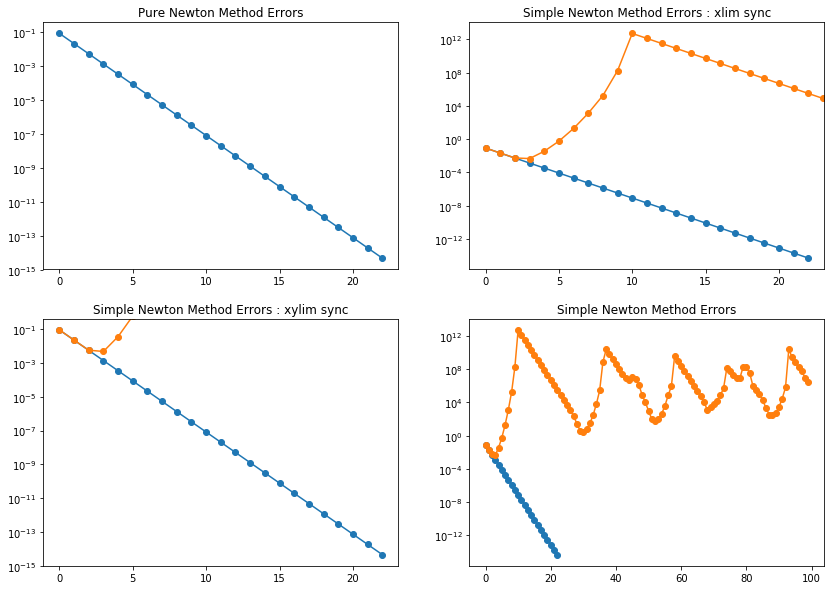

In [3]:
Ss = shf.NewtonPoly(A)
ss = shf.SimpNewtonPoly(A)
# Ss = shf.NewtonPoly(A, X0 = np.array([[0, 1, 0],[0, 0, 1],[0, 0, 0]]))
# Ss = shf.NewtonPoly(A, X0 = 1 * np.eye(3))
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

ax1.semilogy(Ss['errs'],'-o')
ax1.set_title('Pure Newton Method Errors')

ax2.semilogy(Ss['errs'],'-o')
ax2.semilogy(ss['errs'],'-o')
ax2.set_xlim(ax1.get_xlim())
ax2.set_title('Simple Newton Method Errors : xlim sync')

ax3.semilogy(Ss['errs'],'-o')
ax3.semilogy(ss['errs'],'-o')
ax3.set_xlim(ax1.get_xlim())
ax3.set_ylim(ax1.get_ylim())
ax3.set_title('Simple Newton Method Errors : xylim sync')

ax4.semilogy(Ss['errs'],'-o')
ax4.semilogy(ss['errs'],'-o')
ax4.set_title('Simple Newton Method Errors')

print(Ss['sol'])

### Eigenvalues of $P'_{X_{i}}$'s 

In [4]:
# Derivative에 대한 eigenvalues와 vectors
Ds = []
EVs = []
for i in range(len(Ss['P_Xs'])):
    d, ev = nla.eig(Ss['P_Xs'][i])
    Ds.append(d)
    EVs.append(ev)

In [5]:
dss = np.zeros((Ds[-1].shape[0],len(Ds)))
dss = dss.astype(complex)
for i in range(len(EVs)):
    dss[:,i] = np.squeeze(Ds[i])

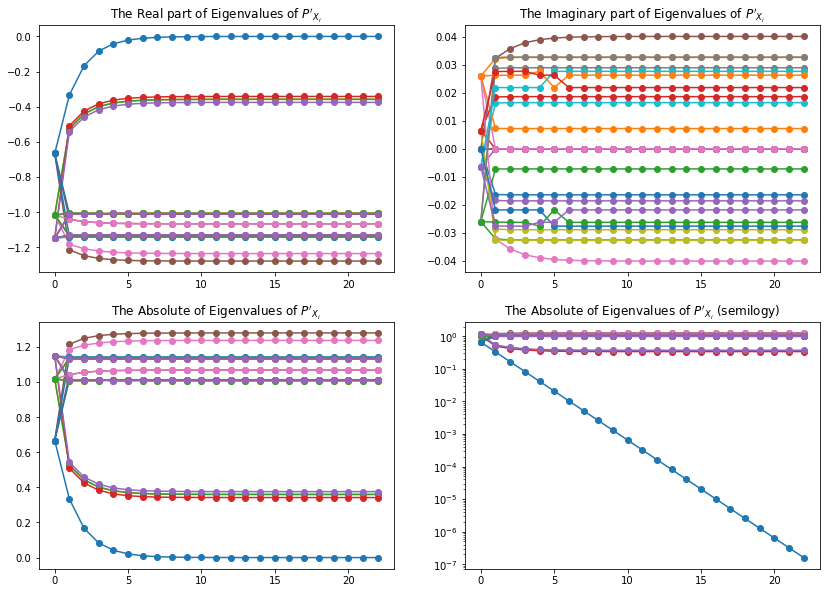

In [6]:
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(221)
ax1.set_title("The Real part of Eigenvalues of $P'_{X_{i}}$")

ax2 = fig.add_subplot(222)
ax2.set_title("The Imaginary part of Eigenvalues of $P'_{X_{i}}$")

ax3 = fig.add_subplot(223)
ax3.set_title("The Absolute of Eigenvalues of $P'_{X_{i}}$")

ax4 = fig.add_subplot(224)
ax4.set_title("The Absolute of Eigenvalues of $P'_{X_{i}}$ (semilogy)")

for i in range(dss.shape[0]):
    ax1.plot(np.real(dss[i,:]),'-o')
    ax2.plot(np.imag(dss[i,:]),'-o')
    ax3.plot(np.abs(dss[i,:]),'-o')
    ax4.semilogy(np.abs(dss[i,:]),'-o')

### Ordered Eigenvalues of $P'_{X_{i}}$'s 

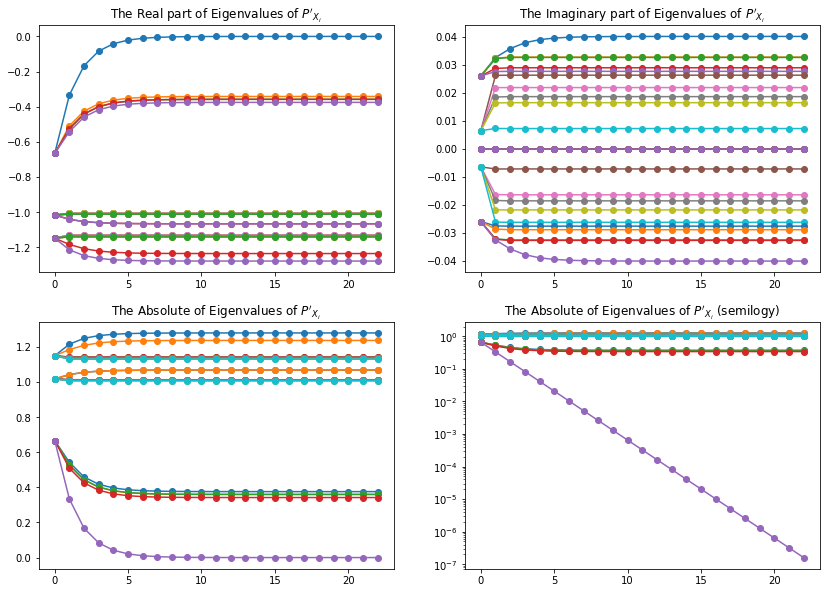

In [7]:
rdss = np.sort(np.real(dss), axis = 0)
rdss = rdss[::-1,:]

idss = np.sort(np.imag(dss), axis = 0)
idss = idss[::-1,:]

adss = np.sort(np.abs(dss), axis = 0)
adss = adss[::-1,:]

fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(221)
ax1.set_title("The Real part of Eigenvalues of $P'_{X_{i}}$")

ax2 = fig.add_subplot(222)
ax2.set_title("The Imaginary part of Eigenvalues of $P'_{X_{i}}$")

ax3 = fig.add_subplot(223)
ax3.set_title("The Absolute of Eigenvalues of $P'_{X_{i}}$")

ax4 = fig.add_subplot(224)
ax4.set_title("The Absolute of Eigenvalues of $P'_{X_{i}}$ (semilogy)")

for i in range(dss.shape[0]):
    ax1.plot(rdss[i,:],'-o')
    ax2.plot(idss[i,:],'-o')
    ax3.plot(adss[i,:],'-o')
    ax4.semilogy(adss[i,:],'-o')

### Coefficients of Eigenvectors of $P'_{X_{i}}$ with respect to $H_{i}$

In [8]:
coeffi = np.zeros((Ss['Hs'][0].shape[0] * Ss['Hs'][0].shape[1],len(EVs)))
coeffi = coeffi.astype(complex)
for i in range(len(EVs)):
    h = nla.solve(EVs[i], np.reshape(Ss['Hs'][i], (Ss['Hs'][i].shape[0] * Ss['Hs'][i].shape[1],1), order='F'))
    coeffi[:,i] = np.squeeze(h)
# coeffi.transpose()

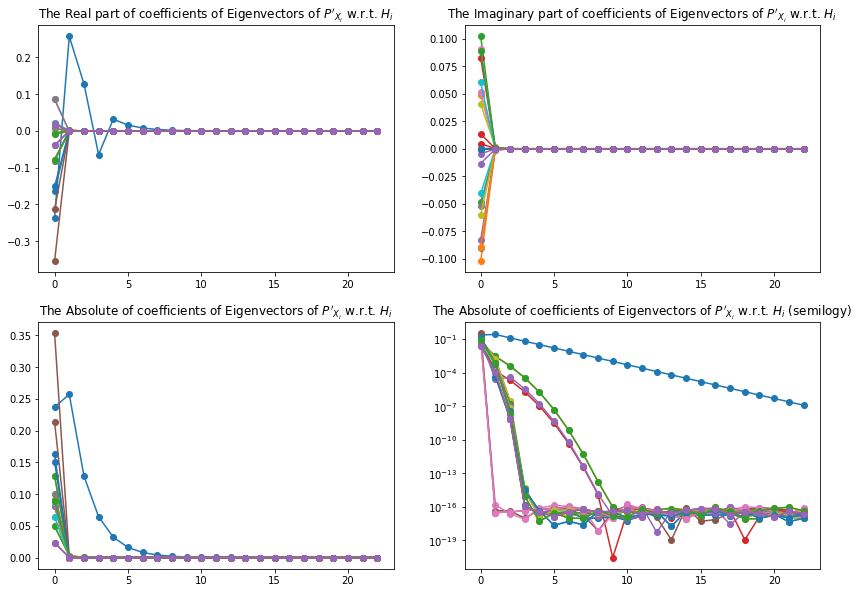

In [9]:
fig = plt.figure(figsize=(14,10))
ax1 = fig.add_subplot(221)
ax1.set_title("The Real part of coefficients of Eigenvectors of $P'_{X_{i}}$ w.r.t. $H_{i}$")

ax2 = fig.add_subplot(222)
ax2.set_title("The Imaginary part of coefficients of Eigenvectors of $P'_{X_{i}}$ w.r.t. $H_{i}$")

ax3 = fig.add_subplot(223)
ax3.set_title("The Absolute of coefficients of Eigenvectors of $P'_{X_{i}}$ w.r.t. $H_{i}$")

ax4 = fig.add_subplot(224)
ax4.set_title("The Absolute of coefficients of Eigenvectors of $P'_{X_{i}}$ w.r.t. $H_{i}$ (semilogy)")

for i in range(coeffi.shape[0]):
    ax1.plot(np.real(coeffi[i,:]),'-o')
    ax2.plot(np.imag(coeffi[i,:]),'-o')
    ax3.plot(np.abs(coeffi[i,:]),'-o')
    ax4.semilogy(np.abs(coeffi[i,:]),'-o')

### Ordered absolute values of coefficients

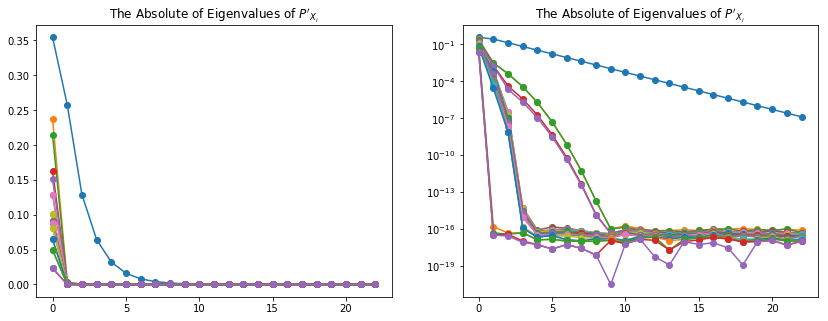

In [10]:
# pprint(abs(coeffi))
fig = plt.figure(figsize=(14,5))
ax1 = fig.add_subplot(121)
ax1.set_title("The Absolute of Eigenvalues of $P'_{X_{i}}$")

ax2 = fig.add_subplot(122)
ax2.set_title("The Absolute of Eigenvalues of $P'_{X_{i}}$")

abcoe = np.sort(np.abs(coeffi), axis = 0)
abcoe = abcoe[::-1,:]
for i in range(abcoe.shape[0]):
    ax1.plot(abcoe[i,:],'-o')
    ax2.semilogy(abcoe[i,:],'-o')

### Norm Distances of between Eigenvectors of $X_{i}$ and $X_{i+1}$

In [11]:
Xevecs = []
for X in Ss['Xs']:
    d, ev = nla.eig(X)
    Xevecs.append(ev)
# pprint(Xevecs)

i = 0
for X in Xevecs:
    if i != 0:
        for j in range(X.shape[0]):
            if np.sign(X0[0,j]) == np.sign(X[0,j]):
                print('  {:.16e}'.format(nla.norm(X0[:,j] - X[:,j])), end='')
            else:
                print('  {:.16e}'.format(nla.norm(X0[:,j] + X[:,j])), end='')
        print('')
    else:
        i += 1
    X0 = X

  1.0514622242382672e+00  1.4374467041838115e+00  1.3230262185905126e+00  8.1658354874397743e-01  1.8991503595924726e+00
  4.0792198665315552e-16  8.0636851370783739e-03  8.0636851370783739e-03  1.5170865670361395e+00  1.5207393105950664e+00
  5.3820057937152048e-16  4.5532380789733030e-04  4.5532380789733030e-04  2.1074911071645896e-05  3.1423736549967970e-05
  4.9960036108132044e-16  3.8315095088242146e-05  3.8315095088242146e-05  1.8435688277635533e-06  2.5978087197961689e-06
  5.9269690555648409e-16  1.8868043609361415e-06  1.8868043609361415e-06  9.5916545302077229e-08  1.2483737617209704e-07
  7.4888637309378457e-16  4.9955898205385089e-08  4.9955898205385089e-08  2.7047321505668209e-09  3.2266275742828788e-09
  5.9529077749218605e-16  6.8430307347931039e-10  6.8430307347931039e-10  3.9656548773662156e-11  4.3206218789420599e-11
  3.5975337699988621e-16  4.7622828731943708e-12  4.7622828731943708e-12  2.9655133522908392e-13  2.9449211419144995e-13
  5.2662502028650516e-16  1.7021